In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import colormaps as cmaps
from magpie_data import NeLMap2, FaradayMap2, PolarimetryMap2, InteferogramOntoAlpha

C:\Users\jdavies\Anaconda3\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
%cd "C:\Users\jdavies\Google Drive\MAGPIE\data\2016\s0322_16 Conical Array Faraday\s0322_16 Far"

C:\Users\jdavies\Google Drive\MAGPIE\data\2016\s0322_16 Conical Array Faraday\s0322_16 Far


In [3]:
R0fn="s0322_16_130608_c1.png"
R1fn="s0322_16_130614_c2.png"
B0fn="s0322_16_134524_c1.png"
B1fn="s0322_16_134531_c2.png"
S0fn="s0322_16_140331_c1.png"
S1fn="s0322_16_140337_c2.png"
s=PolarimetryMap2(R0fn, R1fn, B0fn, B1fn, S0fn, S1fn)

In [4]:
s.register()
s.convert_to_alpha()

C:\Users\jdavies\Anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:549: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


<IPython.core.display.Javascript object>


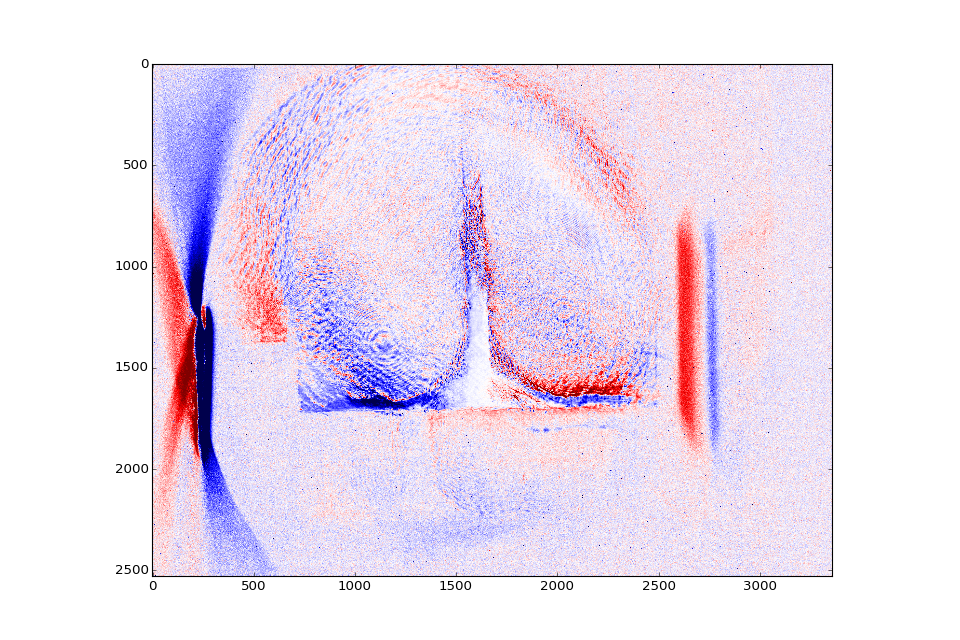

In [5]:
s.plot_data_px(clim=[-1,1])

In [6]:
cd ".."

C:\Users\jdavies\Google Drive\MAGPIE\data\2016\s0322_16 Conical Array Faraday


In [7]:
I0="s0322_16 1053 Interferometry (3).JPG"
I1="s0322_16 1053 Interferometry (2).JPG"
i=InteferogramOntoAlpha(s, I0, I1)
i.register()

C:\Users\jdavies\Anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:549: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


<IPython.core.display.Javascript object>


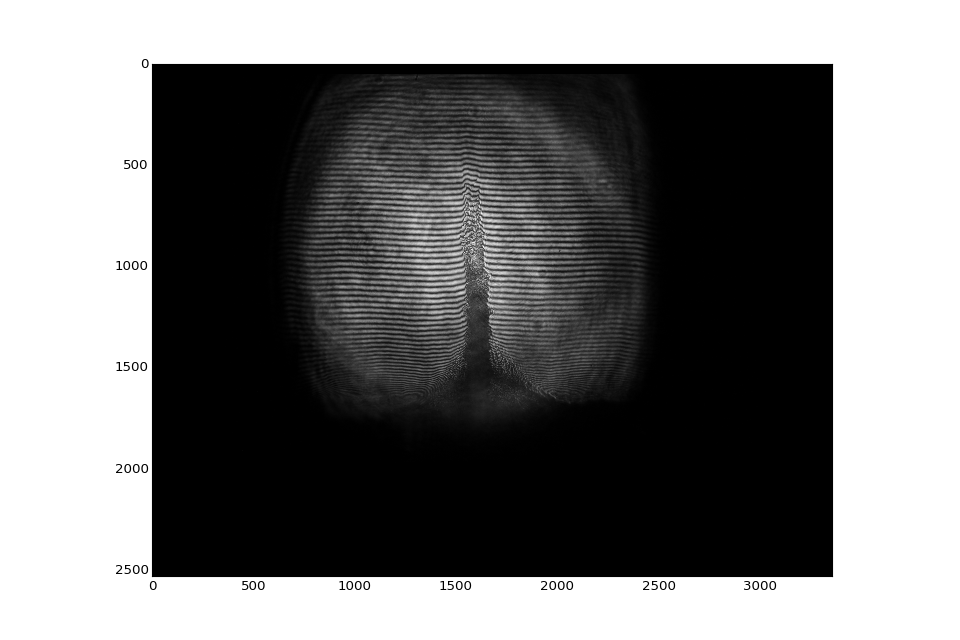

In [8]:
i.plot_data_px(clim=None)

<IPython.core.display.Javascript object>


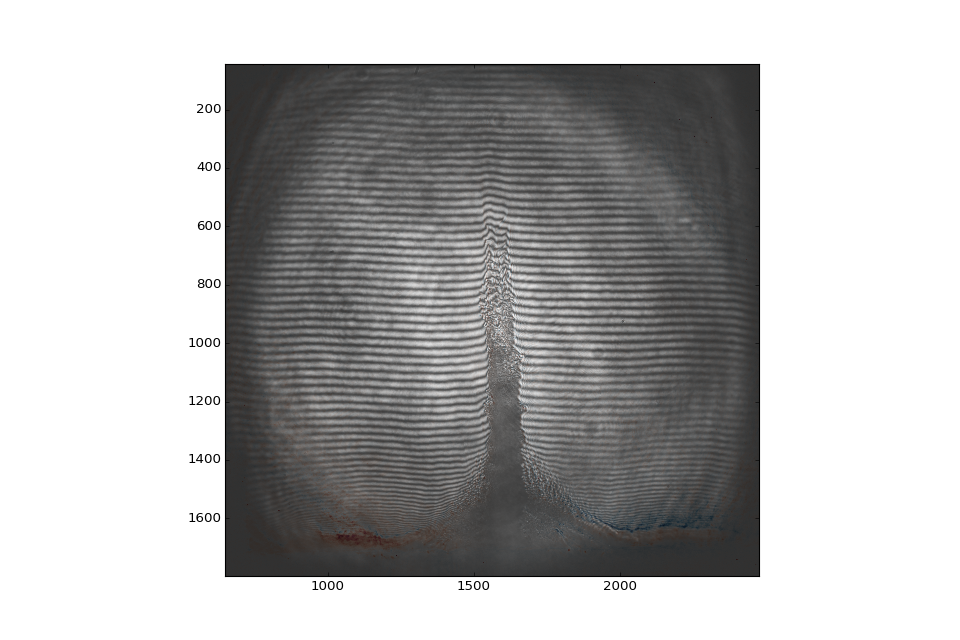

In [9]:
i.plot_overlay_px(clim=[-2,2])

In [29]:
I0="s0322_16 1053 Interferometry (3).JPG"
I0=plt.imread(I0)
I0s=np.sum(I0,2)
scale=s.S0.shape[0]/I0s.shape[0]
I0z=zoom(I0s, scale)
crop=(I0z.shape[1]-s.S0.shape[1])/2
I0zc=I0z[:,crop:-crop]
I0zcn=np.flipud(I0zc/I0zc.max())

C:\Users\jdavies\Anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:549: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)
C:\Users\jdavies\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


<IPython.core.display.Javascript object>


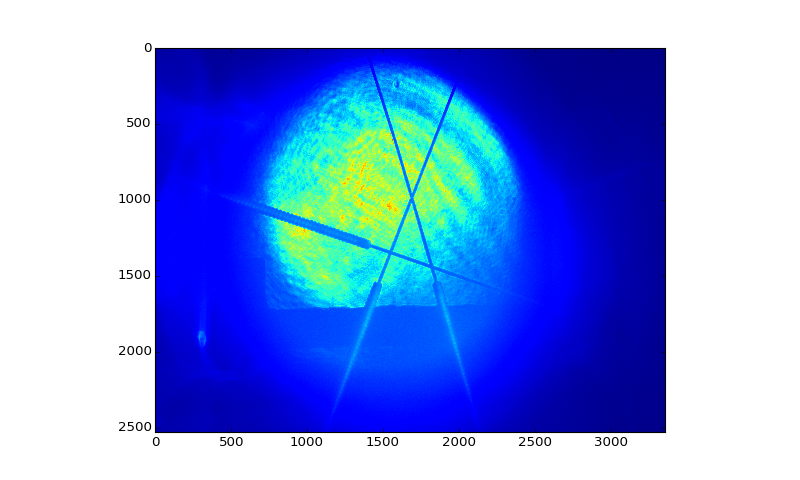

In [26]:
fig, ax=plt.subplots(figsize=(10,6))
ax.imshow(s.R0)

<IPython.core.display.Javascript object>


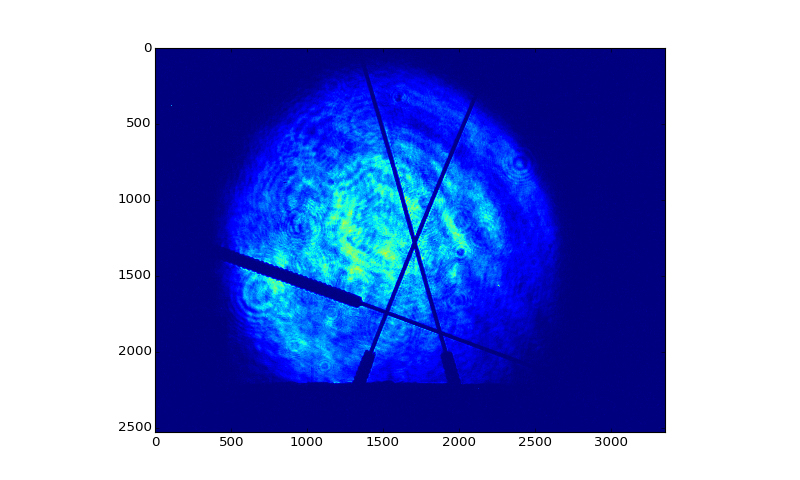

In [32]:
fig, ax=plt.subplots(figsize=(10,6))
ax.imshow(I0zcn)

In [33]:
result=ird.similarity(s.R0, I0zcn, numiter=3)

C:\Users\jdavies\Anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:549: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


In [58]:
I1="s0322_16 1053 Interferometry (2).JPG"
I1=plt.imread(I1)
I1s=np.sum(I1,2)
I1z=zoom(I1s, scale)
I1zc=I1z[:,crop:-crop]
I1zcf=np.flipud(I1zc)

C:\Users\jdavies\Anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:549: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)
C:\Users\jdavies\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [60]:
IT=ird.transform_img_dict(I1zcf, result)

C:\Users\jdavies\Anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:549: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


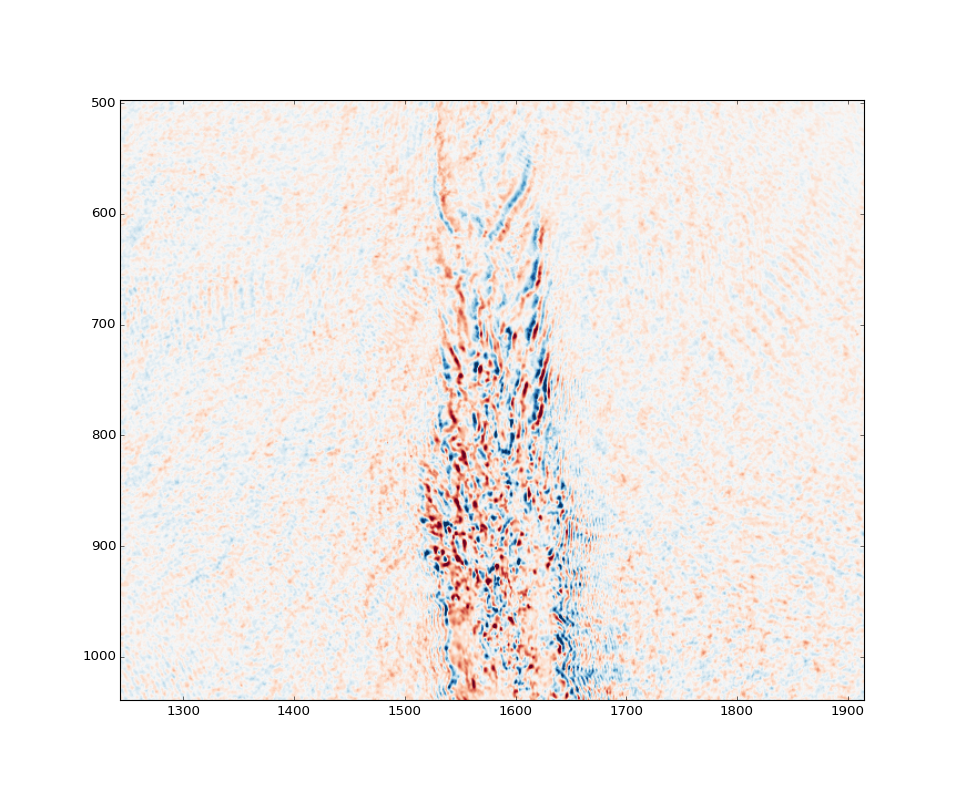

In [88]:
fig, ax=plt.subplots(figsize=(12,10))
ax.imshow(s.alpha, cmap='RdBu', clim=[-1,1])
#ax.imshow(IT, cmap='gray', alpha=.8)

In [89]:
s

C:\Users\jdavies\Anaconda3\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


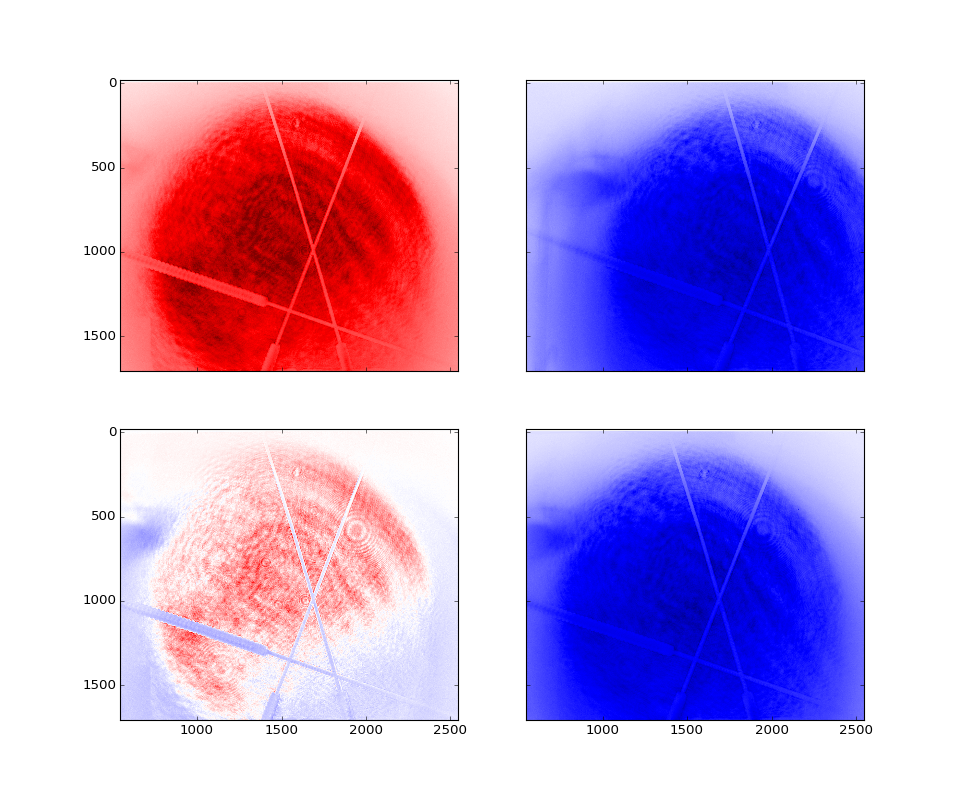

In [54]:
l=0.2
fig, ax=plt.subplots(2,2, figsize=(12,10), sharex=True, sharey=True)
ax[0,0].imshow(s.R0, cmap='seismic', clim=[-l,l])
ax[0,1].imshow(-s.R1, cmap='seismic', clim=[-l,l])
ax[1,0].imshow(s.R0-s.result['timg'], cmap='seismic', clim=[-l,l])
ax[1,1].imshow(-s.result['timg'], cmap='seismic', clim=[-l,l])